In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_dropout_model(dropout_rate=0.2):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    return model

dropout_model = create_dropout_model(dropout_rate=0.2)
optimizer = Adam(learning_rate=0.001)
dropout_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

dropout_history = dropout_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

dropout_eval = dropout_model.evaluate(X_test, y_test, verbose=0)
print("Dropout Model - Loss: {:.4f}, Accuracy: {:.4f}".format(dropout_eval[0], dropout_eval[1]))

Dropout Model - Loss: 0.4760, Accuracy: 0.8350


In [2]:


def create_gradient_clip_model(clip_norm=1.0):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=0.001, clipnorm=clip_norm)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

clip_model = create_gradient_clip_model(clip_norm=1.0)

clip_history = clip_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

clip_eval = clip_model.evaluate(X_test, y_test, verbose=0)
print("Gradient Clipping Model - Loss: {:.4f}, Accuracy: {:.4f}".format(clip_eval[0], clip_eval[1]))



Gradient Clipping Model - Loss: 0.8936, Accuracy: 0.8500


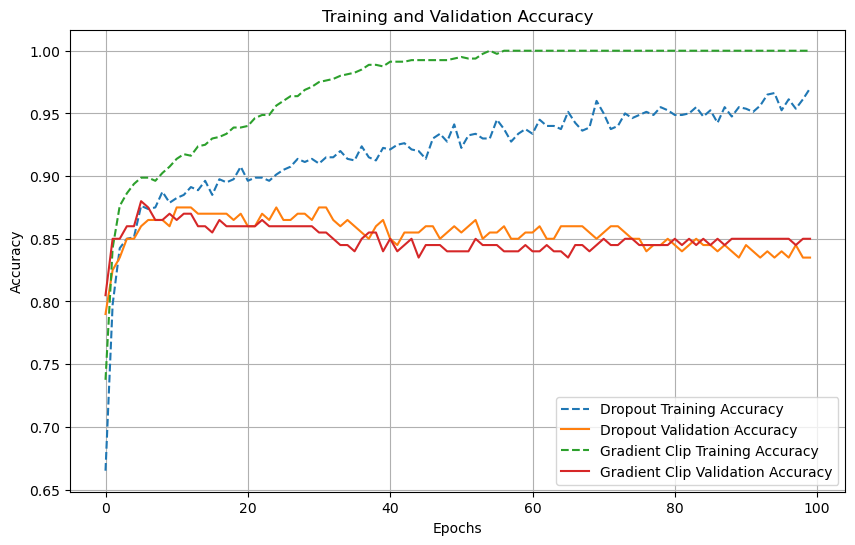

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(dropout_history.history['accuracy'], label='Dropout Training Accuracy', linestyle='--')
plt.plot(dropout_history.history['val_accuracy'], label='Dropout Validation Accuracy')

plt.plot(clip_history.history['accuracy'], label='Gradient Clip Training Accuracy', linestyle='--')
plt.plot(clip_history.history['val_accuracy'], label='Gradient Clip Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

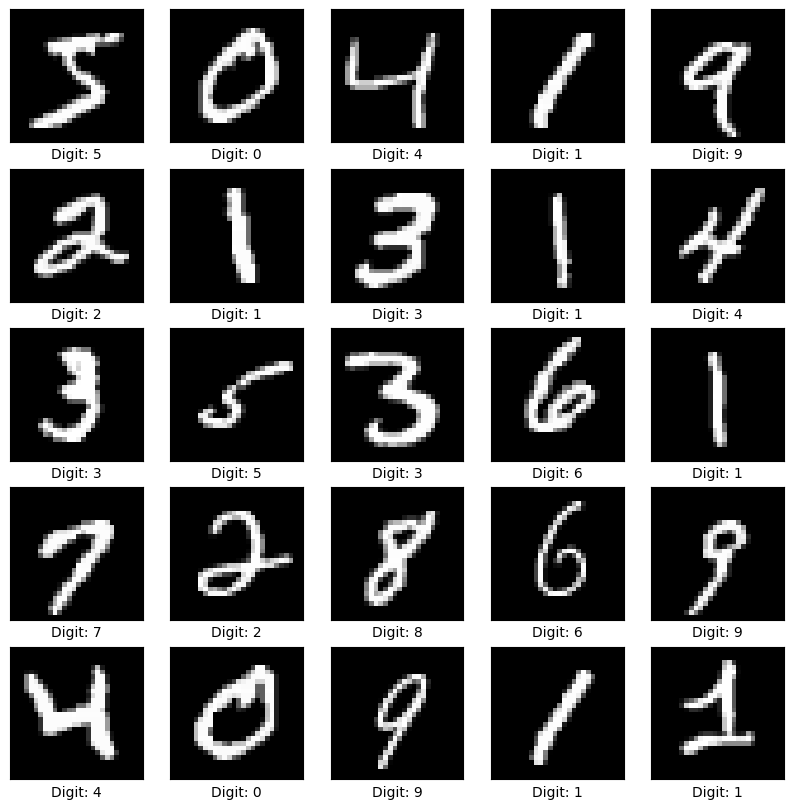

Epoch 1/20
1875/1875 - 4s - 2ms/step - accuracy: 0.9561 - loss: 0.1194 - val_accuracy: 0.9791 - val_loss: 0.0640
Epoch 2/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9800 - loss: 0.0578 - val_accuracy: 0.9827 - val_loss: 0.0475
Epoch 3/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9857 - loss: 0.0412 - val_accuracy: 0.9863 - val_loss: 0.0400
Epoch 4/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9892 - loss: 0.0318 - val_accuracy: 0.9856 - val_loss: 0.0417
Epoch 5/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9911 - loss: 0.0256 - val_accuracy: 0.9862 - val_loss: 0.0419
Epoch 6/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9932 - loss: 0.0199 - val_accuracy: 0.9870 - val_loss: 0.0426
313/313 - 0s - 653us/step - accuracy: 0.9863 - loss: 0.0400
Test Loss: 0.0400, Test Accuracy: 0.9863


Early stopping occurred at epoch: 3


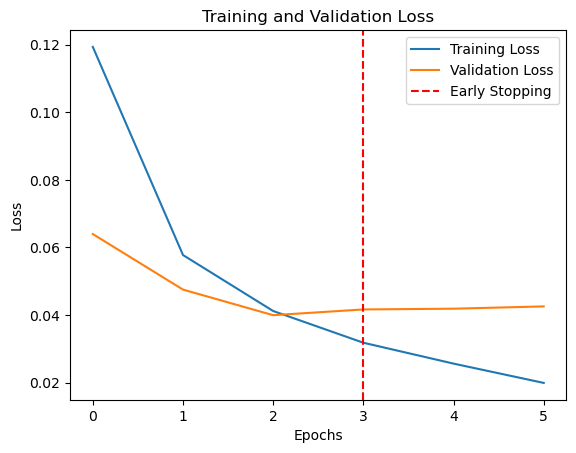

In [18]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_train])
y_test_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_test])

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(f"Digit: {y_train[i]}")
plt.show()

inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
outputs_parity = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs_parity)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train_parity,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test_parity),
    callbacks=[early_stopping],
    verbose=2
)

test_loss, test_acc = model.evaluate(x_test, y_test_parity, verbose=2)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

early_stopping_epoch = len(history.history['loss']) - early_stopping.patience
print("\n\nEarly stopping occurred at epoch:", early_stopping_epoch)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early Stopping')
plt.legend()
plt.show()


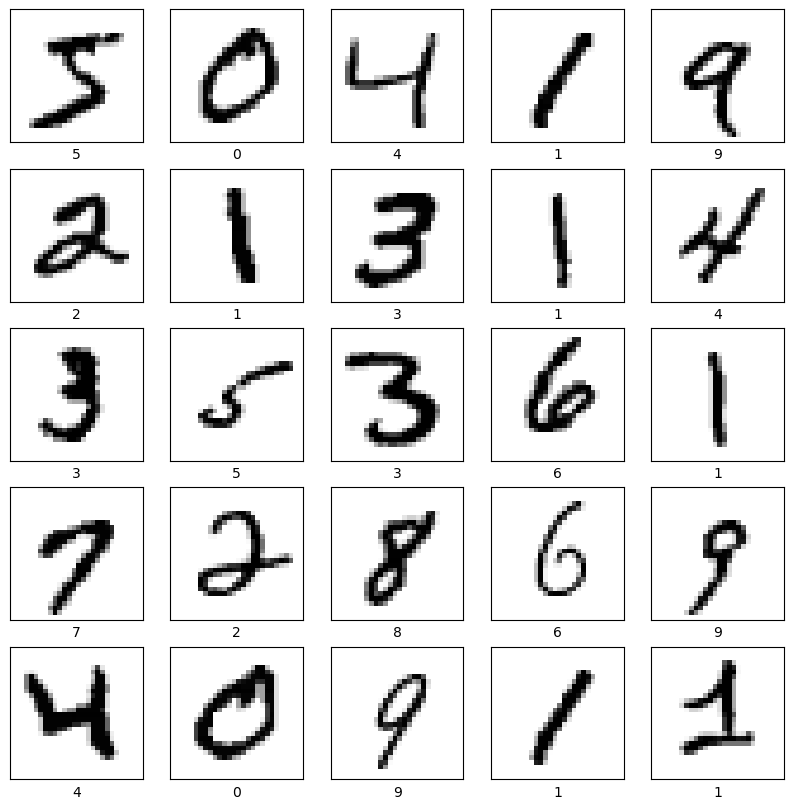

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - dense_11_accuracy: 0.8614 - dense_12_accuracy: 0.9054 - loss: 0.7260 - val_dense_11_accuracy: 0.9498 - val_dense_12_accuracy: 0.9676 - val_loss: 0.2648
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - dense_11_accuracy: 0.9562 - dense_12_accuracy: 0.9708 - loss: 0.2255 - val_dense_11_accuracy: 0.9638 - val_dense_12_accuracy: 0.9766 - val_loss: 0.1922
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - dense_11_accuracy: 0.9723 - dense_12_accuracy: 0.9800 - loss: 0.1515 - val_dense_11_accuracy: 0.9640 - val_dense_12_accuracy: 0.9753 - val_loss: 0.1927
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - dense_11_accuracy: 0.9785 - dense_12_accuracy: 0.9852 - loss: 0.1154 - val_dense_11_accuracy: 0.9719 - val_dense_12_accuracy: 0.9808 - val_loss: 0.1519
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - dense_11_accuracy: 0.9850 - dense_12_accuracy: 0.9883 - loss: 0.0881 - val_dense_11_accuracy: 0.9730 - val_dense

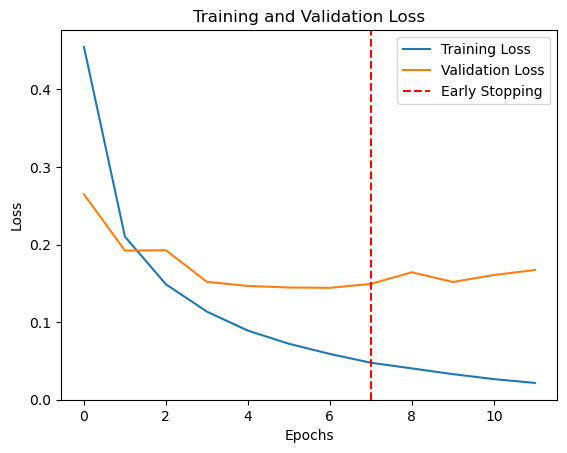

In [17]:

from tensorflow import keras
from tensorflow.keras import layers

mnist = keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_train])
y_test_parity = np.array([np.sum(np.array(list(map(int , str(y))))) % 2 for y in y_test])

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

inputs = keras.Input(shape=(28,28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10,activation='softmax')(x)
outputs_parity = layers.Dense(1,activation='sigmoid')(x)

model = keras.Model(inputs = inputs, outputs = [outputs, outputs_parity])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy','binary_crossentropy'],
              metrics=[['accuracy'],['accuracy']])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

history = model.fit(x_train, [y_train,y_train_parity], epochs=20, validation_split=0.2,callbacks=[early_stopping])

early_stopping_epoch = np.argmin(history.history['val_loss']) + 1
print("\n\nEarly stopping occured at epoch:",early_stopping_epoch)

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early Stopping')
plt.legend()
plt.show()